<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/IE/Subdomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subdomain weighted residual method

Consider the Fredholm integral equation:

$u(x)=e^{x} - x + \int_{0}^{1} xtu(t)$


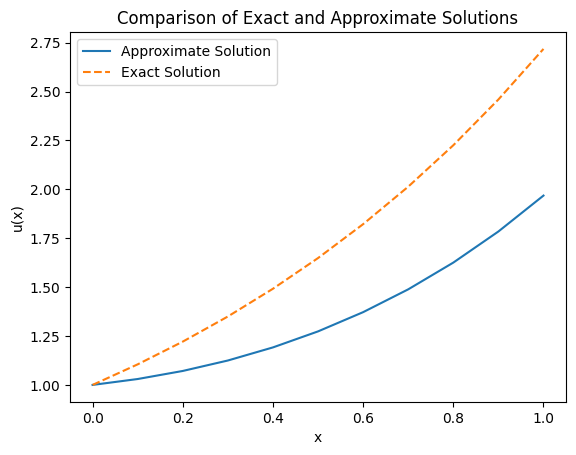

In [4]:
import numpy as np
from scipy.integrate import quad

def kernel(t, x):
    return x * t

def subdomain_method(N):
    # Number of subdomains
    h = 1 / N

    # Initialize the solution array
    u_approx = np.zeros(N+1)

    # Compute the subdomain solutions
    for i in range(N+1):
        xi = i * h
        u_approx[i] = np.exp(xi) - xi

        # Integrate over the subdomain
        for j in range(N):
            tj = (j + 0.5) * h
            integral, _ = quad(kernel, 0, 1, args=(xi,))
            u_approx[i] += h * tj * integral

    return u_approx

# Number of subdomains (adjust as needed)
N_subdomains = 10
u_approximation = subdomain_method(N_subdomains)

# Compare with the exact solution u(x) = e^x
x_values = np.linspace(0, 1, N_subdomains+1)
exact_solution = np.exp(x_values)
np.abs(exact_solution-u_approximation)
# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_values, u_approximation, label='Approximate Solution')
plt.plot(x_values, exact_solution, label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of Exact and Approximate Solutions')
plt.legend()
plt.show()